In [1]:
%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the logistic
%  regression exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.

data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


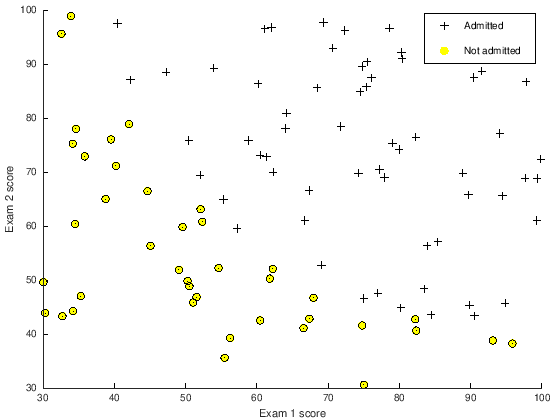

In [2]:
%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;


In [3]:
%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
Xm = [ones(m, 1) X];


% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, Xm, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, Xm, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903 
 2.566234 
 2.646797 
Expected gradients (approx):
 0.043
 2.566
 2.647


    fminunc at line 214 column 12
Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


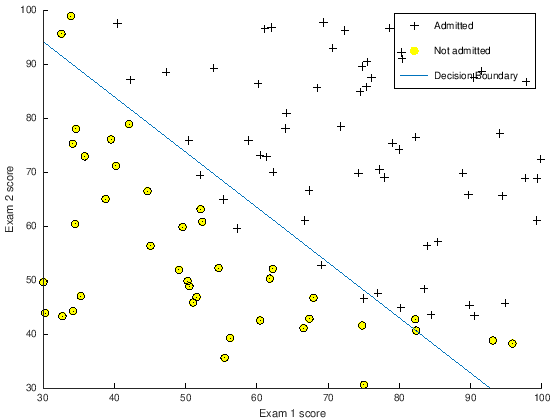

In [4]:
%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, Xm, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

% Plot Boundary
plotDecisionBoundary(theta, Xm, y);

% Put some labels
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

In [9]:
%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you'll like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1
%  and score 85 on exam 2

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

% Compute accuracy on our training set
p = predict(theta, Xm);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');
fprintf('\n');


For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0



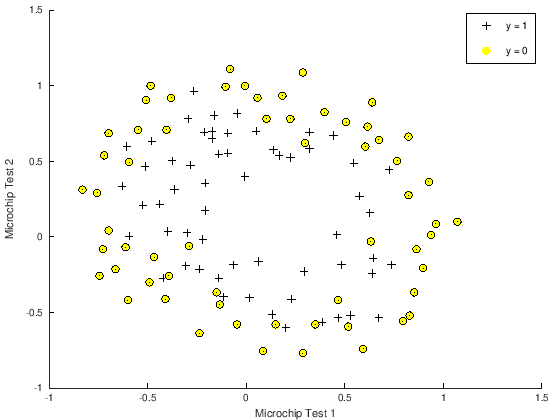

In [21]:
%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the second part
%  of the exercise which covers regularization with logistic regression.
%
%  You will need to complete the following functions in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).

data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;


In [35]:
%% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic
%  regression to classify the data points.
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
Xm = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(Xm, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, Xm, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

% Compute and display cost and gradient
% with all-ones theta and lambda = 10
test_theta = ones(size(Xm,2),1);
[cost, grad] = costFunctionReg(test_theta, Xm, y, 10);

fprintf('\nCost at test theta (with lambda = 10): %f\n', cost);
fprintf('Expected cost (approx): 3.16\n');
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115

Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.346045 
 0.161352 
 0.194796 
 0.226863 
 0.092186 
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


In [30]:
(1/length(y)) * test_theta

ans =

   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746
   0.0084746

